In [3]:

%run ../../load_magic/storage.py
%run ../../load_magic/dataframes.py
%pprint
%who

DATA_FOLDER: ../data/
SAVES_FOLDER: ../saves/
Pretty printing has been turned OFF
DATA_CSV_FOLDER	 DATA_FOLDER	 ENCODING_TYPE	 SAVES_CSV_FOLDER	 SAVES_FOLDER	 SAVES_PICKLE_FOLDER	 SelectKBest	 attempt_to_pickle	 example_iterrows	 
get_column_descriptions	 load_csv	 load_dataframes	 load_object	 math	 os	 pd	 pickle	 save_dataframes	 
store_objects	 sys	 


In [4]:

import pandas as pd

html_dir = os.path.join(DATA_FOLDER, 'html')
html_path = os.path.join(html_dir, 'aoestats.io_stats.html')
win_rate_df = pd.read_html(html_path)[0]
win_rate_df.set_index('Civilization', drop=True, inplace=True)
for column_name in ['Win Rate', 'Play Rate']:
    win_rate_df[column_name] = win_rate_df[column_name].map(lambda x: float(x.split('%')[0]))

def get_hours(x):
    
    return int(x.split(':')[0])

def get_minutes(x):
    
    return int(x.split(':')[1])

def get_seconds(x):
    
    return int(x.split(':')[0])
    
for column_name in ['Feudal Time', 'Castle Time', 'Imperial Time', 'Game Length']:
    win_rate_df['{} Hours'.format(column_name)] = win_rate_df[column_name].map(get_hours)
    win_rate_df['{} Minutes'.format(column_name)] = win_rate_df[column_name].map(get_minutes)
    win_rate_df['{} Seconds'.format(column_name)] = win_rate_df[column_name].map(get_seconds)
win_rate_df.sample(10).T

Civilization,Goths,Byzantines,Chinese,Incas,Vikings,Ethiopians,Portuguese,Teutons,Persians,Burmese
Win Rate,48.93,49.56,46.98,56.52,55.37,50.47,40.52,49.97,50.62,48.73
Play Rate,6.94,6.92,6.82,5.78,6.86,5.64,5.62,6.97,6.69,5.65
Score,6102,6614,6421,5986,6468,6004,5834,6401,6675,6331
Research,20,22,22,21,22,21,19,21,21,21
Feudal Time,0:11:24,0:11:20,0:11:29,0:11:08,0:11:29,0:11:12,0:11:10,0:11:07,0:10:54,0:11:04
Castle Time,0:24:02,0:24:09,0:23:57,0:24:21,0:23:49,0:24:15,0:24:10,0:23:44,0:23:05,0:23:40
Imperial Time,0:40:36,0:39:20,0:39:35,0:39:58,0:39:11,0:39:26,0:40:07,0:39:53,0:38:23,0:39:29
Game Length,0:40:47,0:42:20,0:41:20,0:39:56,0:41:06,0:40:07,0:40:11,0:41:45,0:41:55,0:41:10
Feudal Time Hours,0,0,0,0,0,0,0,0,0,0
Feudal Time Minutes,11,11,11,11,11,11,11,11,10,11


In [5]:

win_rate_df.columns

Index(['Win Rate', 'Play Rate', 'Score', 'Research', 'Feudal Time',
       'Castle Time', 'Imperial Time', 'Game Length', 'Feudal Time Hours',
       'Feudal Time Minutes', 'Feudal Time Seconds', 'Castle Time Hours',
       'Castle Time Minutes', 'Castle Time Seconds', 'Imperial Time Hours',
       'Imperial Time Minutes', 'Imperial Time Seconds', 'Game Length Hours',
       'Game Length Minutes', 'Game Length Seconds'],
      dtype='object')

In [6]:

win_rate_df.index

Index(['Aztecs', 'Berbers', 'Britons', 'Burmese', 'Byzantines', 'Celts',
       'Chinese', 'Ethiopians', 'Franks', 'Goths', 'Huns', 'Incas', 'Indians',
       'Italians', 'Japanese', 'Khmer', 'Koreans', 'Magyars', 'Malay',
       'Malians', 'Mayans', 'Mongols', 'Persians', 'Portuguese', 'Saracens',
       'Slavs', 'Spanish', 'Teutons', 'Turks', 'Vietnamese', 'Vikings'],
      dtype='object', name='Civilization')

In [7]:

columns_list = win_rate_df.columns
file_path = os.path.join(DATA_CSV_FOLDER, 'win_rate_df.csv')
print('Saving to {}'.format(os.path.abspath(file_path)))
win_rate_df[columns_list].to_csv(file_path)
save_dataframes(include_index=True, win_rate_df=win_rate_df[columns_list])
xlsx_folder = os.path.join(DATA_FOLDER, 'xlsx')
os.makedirs(name=xlsx_folder, exist_ok=True)
file_path = os.path.join(xlsx_folder, 'win_rate_df.xlsx')
print('Saving to {}'.format(os.path.abspath(file_path)))
win_rate_df[columns_list].to_excel(file_path)

Saving to C:\Users\dev\Documents\repositories\notebooks\age-of-empires-ii\data\csv\win_rate_df.csv
Saving to C:\Users\dev\Documents\repositories\notebooks\age-of-empires-ii\saves\csv\win_rate_df.csv
Saving to C:\Users\dev\Documents\repositories\notebooks\age-of-empires-ii\data\xlsx\win_rate_df.xlsx


In [8]:

index_name = 'Bonus Name'
dataframes_dict = load_dataframes(civilization_bonuses_df='civilization_bonuses_df')
civilization_bonuses_df = dataframes_dict['civilization_bonuses_df']
if 'Unnamed: 0' in civilization_bonuses_df.columns:
    civilization_bonuses_df = civilization_bonuses_df.set_index('Unnamed: 0')
elif index_name in civilization_bonuses_df.columns:
    civilization_bonuses_df = civilization_bonuses_df.set_index(index_name)
civilization_bonuses_df.index.name = index_name

Attempting to load C:\Users\dev\Documents\repositories\notebooks\age-of-empires-ii\saves\pickle\civilization_bonuses_df.pickle.
No pickle exists - attempting to load C:\Users\dev\Documents\repositories\notebooks\age-of-empires-ii\saves\csv\civilization_bonuses_df.csv.


In [9]:

civilization_bonuses_df.columns

Index(['Aztecs', 'Berbers', 'Britons', 'Burmese', 'Byzantines', 'Celts',
       'Chinese', 'Ethiopians', 'Franks', 'Goths', 'Huns', 'Incas', 'Indians',
       'Italians', 'Japanese', 'Khmer', 'Koreans', 'Magyars', 'Malay',
       'Malians', 'Mayans', 'Mongols', 'Persians', 'Portuguese', 'Saracens',
       'Slavs', 'Spanish', 'Teutons', 'Turks', 'Vietnamese', 'Vikings'],
      dtype='object')

In [10]:

civilization_bonuses_df.index

Index(['Arbalest_Attack_Range_vs_buildings_in_the_Imperial_Age',
       'Arbalest_Attack_Range_vs_units_in_the_Imperial_Age',
       'Arbalest_creation_speed', 'Arbalest_Gold_in_the_Imperial_Age',
       'Arbalest_HP_rating_in_the_Castle_Age',
       'Arbalest_HP_rating_in_the_Feudal_Age',
       'Arbalest_HP_rating_in_the_Imperial_Age',
       'Arbalest_Wood_in_the_Imperial_Age',
       'Archer_Attack_Range_vs_buildings_in_the_Castle_Age',
       'Archer_Attack_Range_vs_buildings_in_the_Imperial_Age',
       ...
       'Wild_Boar_per_Villager_per_Minute_to_the_Town_Center_upon_reaching_Feudal_Age',
       'Wild_Boar_per_Villager_per_Minute_to_the_Town_Center_upon_reaching_Imperial_Age',
       'Woad_Raider_gold_cost', 'Woad_Raider_move_Speed', 'Wonder_build_time',
       'Wonder_cost_in_stone', 'Wonder_cost_in_wood',
       'Wonder_HP_upon_reaching_Imperial_Age', 'Wood_consumption_rate',
       'Wood_stockpile_at_start_of_game'],
      dtype='object', name='Bonus Name', length=1312)

In [11]:

# New set with columns common to win_rate_df and civilization_bonuses_df
set.intersection(set(win_rate_df.columns), set(civilization_bonuses_df.columns))

set()

In [12]:

# New list with elements common to win_rate_df indexes and civilization_bonuses_df columns
columns_list = list(set.intersection(set(win_rate_df.index), set(civilization_bonuses_df.columns)))
merge_df = pd.merge(left=win_rate_df, right=civilization_bonuses_df.T, left_index=True,
                    right_index=True, suffixes=('_win_rate', '_civilization_bonuses'))

In [13]:

# New set with columns in the columns list common to merge dataframe index
set.intersection(set(columns_list), set(merge_df.index))

{'Indians', 'Huns', 'Teutons', 'Mongols', 'Mayans', 'Slavs', 'Aztecs', 'Byzantines', 'Persians', 'Ethiopians', 'Khmer', 'Britons', 'Koreans', 'Chinese', 'Berbers', 'Vikings', 'Italians', 'Malay', 'Portuguese', 'Malians', 'Vietnamese', 'Incas', 'Japanese', 'Saracens', 'Spanish', 'Goths', 'Magyars', 'Celts', 'Turks', 'Franks', 'Burmese'}

In [14]:

merge_df.index

Index(['Aztecs', 'Berbers', 'Britons', 'Burmese', 'Byzantines', 'Celts',
       'Chinese', 'Ethiopians', 'Franks', 'Goths', 'Huns', 'Incas', 'Indians',
       'Italians', 'Japanese', 'Khmer', 'Koreans', 'Magyars', 'Malay',
       'Malians', 'Mayans', 'Mongols', 'Persians', 'Portuguese', 'Saracens',
       'Slavs', 'Spanish', 'Teutons', 'Turks', 'Vietnamese', 'Vikings'],
      dtype='object', name='Civilization')

In [15]:

import re

merge_df.columns = [re.sub(' +', '_', cn) for cn in merge_df.columns]
merge_df.columns

Index(['Win_Rate', 'Play_Rate', 'Score', 'Research', 'Feudal_Time',
       'Castle_Time', 'Imperial_Time', 'Game_Length', 'Feudal_Time_Hours',
       'Feudal_Time_Minutes',
       ...
       'Wild_Boar_per_Villager_per_Minute_to_the_Town_Center_upon_reaching_Feudal_Age',
       'Wild_Boar_per_Villager_per_Minute_to_the_Town_Center_upon_reaching_Imperial_Age',
       'Woad_Raider_gold_cost', 'Woad_Raider_move_Speed', 'Wonder_build_time',
       'Wonder_cost_in_stone', 'Wonder_cost_in_wood',
       'Wonder_HP_upon_reaching_Imperial_Age', 'Wood_consumption_rate',
       'Wood_stockpile_at_start_of_game'],
      dtype='object', length=1332)

In [16]:

column_descriptions_df = get_column_descriptions(merge_df)
column_descriptions_df['dtype'].unique()

array(['int64', 'float64', 'object'], dtype=object)

In [17]:

column_descriptions_df.columns

Index(['column_name', 'dtype', 'count_blanks', 'count_uniques', 'count_zeroes',
       'has_dates', 'min_value', 'max_value', 'only_integers'],
      dtype='object')

In [18]:

numeric_match_series = column_descriptions_df['dtype'].isin(['int64', 'float64'])
column_descriptions_df[~numeric_match_series]['column_name'].tolist()

['Feudal_Time', 'Castle_Time', 'Imperial_Time', 'Game_Length']

In [19]:

max_win_rate = merge_df['Win_Rate'].max()
def f(row_series):
    win_rate = row_series['Win_Rate']
    
    return win_rate == max_win_rate

merge_df['is_winner'] = merge_df.apply(f, axis=1)

In [20]:

column_name = 'is_winner'
numeric_columns_list = column_descriptions_df[numeric_match_series]['column_name'].tolist()
X = merge_df[numeric_columns_list].values
y = merge_df[column_name].values


# Display Feature Selection in Charts

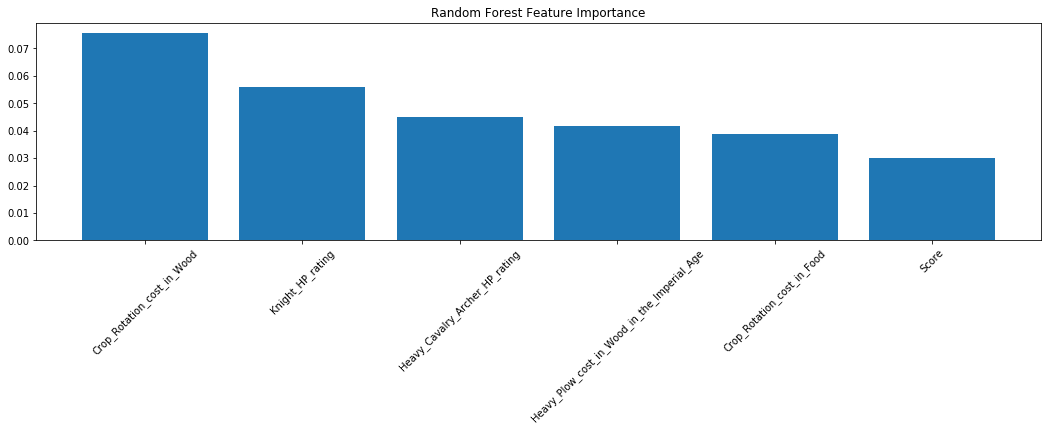

In [23]:

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.pyplot as plt
%matplotlib inline

regr = RandomForestClassifier(max_depth=None, n_estimators=100, criterion='entropy')
regr.fit(X, y)
importance_tuple_list = sorted([(cn, ci) for cn,
                                ci in zip(numeric_columns_list,
                                          regr.feature_importances_) if ci > 0.0],
                               key=lambda x: x[1], reverse=True)[:6]
plt.figure(figsize=(18, 4))
barcontainer_obj = plt.bar(range(len(importance_tuple_list)),
                           [ci for cn, ci in importance_tuple_list])
xticklabel_obj_list = plt.xticks(range(len(importance_tuple_list)),
                                 [cn for cn, ci in importance_tuple_list], rotation=45)
title_text = plt.title('Random Forest Feature Importance')


# Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi squared ($\chi^2$) statistical test for non-negative features to select six of the best features from the A0E2 Civilization Bonuses dataset.

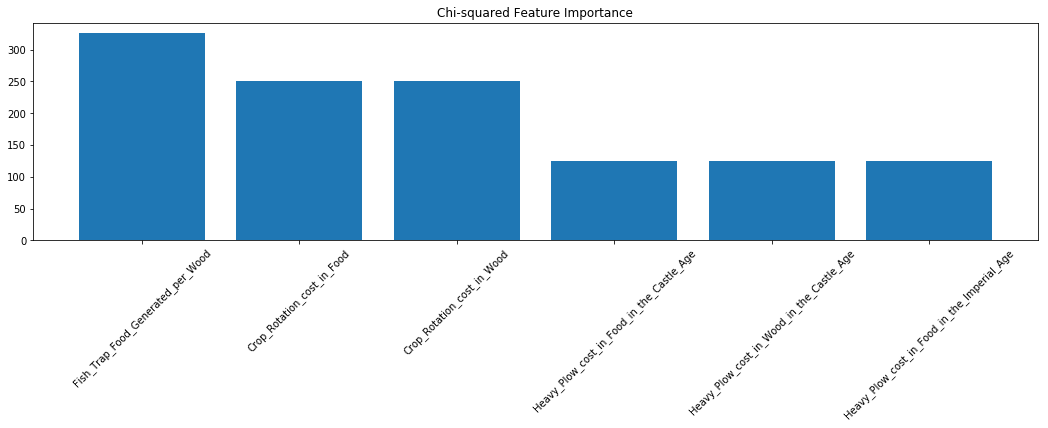

In [26]:

# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature extraction
kbest = SelectKBest(score_func=chi2, k=6)
fit = kbest.fit(X, y)
importance_tuple_list = sorted([(cn, ci) for cn,
                                ci in zip(numeric_columns_list, fit.scores_) if ci > 0.0],
                               key=lambda x: x[1], reverse=True)[:6]
plt.figure(figsize=(18, 4))
barcontainer_obj = plt.bar(range(len(importance_tuple_list)),
                           [ci for cn, ci in importance_tuple_list])
xticklabel_obj_list = plt.xticks(range(len(importance_tuple_list)),
                                 [cn for cn, ci in importance_tuple_list], rotation=45)
title_text = plt.title('Chi-squared Feature Importance')


# Recursive Feature Elimination

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

The example below uses RFE with the logistic regression algorithm to select the top six features. The choice of algorithm does not matter too much as long as it is skillful and consistent.

In [32]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import re

# Feature Extraction with RFE
estimator = LogisticRegression(solver='lbfgs')
rfe = RFE(estimator, n_features_to_select=6, step=1, verbose=0)
fit = rfe.fit(X, y)
print('Logistic Regression Feature Importance')
selected_features_list = list(cn for cn, cb in zip(numeric_columns_list, fit.support_) if cb)
features_list = [re.sub('_', ' ', ft) for ft in selected_features_list]
list_str = ', and '.join([', '.join(features_list[:-1])] + [features_list[-1]])
print('The most important civilization bonuses are: {}.'.format(list_str))

Logistic Regression Feature Importance
The selected features are: Castle cost in stone, Crop Rotation cost in Food, Crop Rotation cost in Wood, Heavy Plow cost in Food in the Castle Age, Heavy Plow cost in Wood in the Castle Age, and Heavy Plow cost in Wood in the Imperial Age.


In [33]:

merge_df.shape

(31, 1333)


# Feature Importance

Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

In the example below we construct a ExtraTreesClassifier classifier for the AoE2 Civilization Bonuses dataset.

In [128]:

column_name = 'is_winner'
numeric_columns_list = column_descriptions_df[numeric_match_series]['column_name'].tolist()
X = merge_df[numeric_columns_list].values
y = merge_df[column_name].values

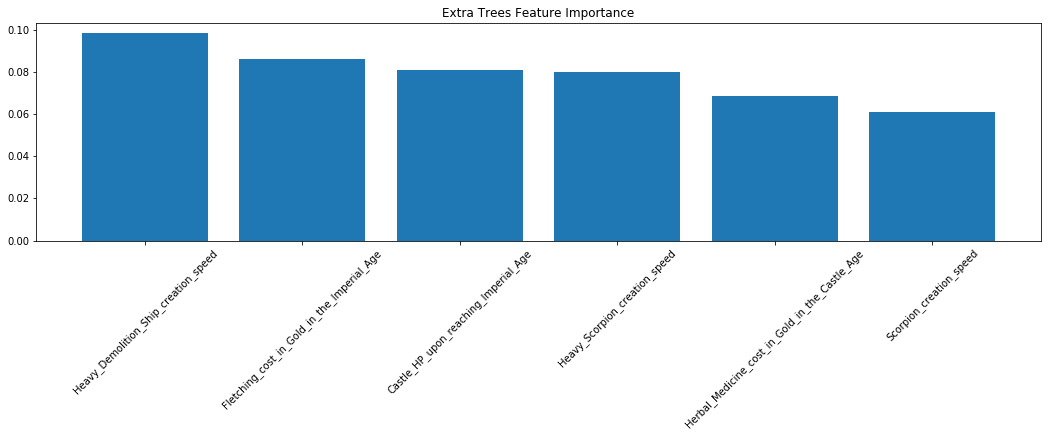

In [129]:

# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

# feature extraction
model = ExtraTreesClassifier(max_depth=None, n_estimators=100, criterion='entropy')
model.fit(X, y)
importance_tuple_list = sorted([(cn, ci) for cn,
                                ci in zip(columns_list, model.feature_importances_) if ci > 0.0],
                               key=lambda x: x[1], reverse=True)[:6]
plt.figure(figsize=(18, 4))
barcontainer_obj = plt.bar(range(len(importance_tuple_list)),
                           [ci for cn, ci in importance_tuple_list])
xticklabel_obj_list = plt.xticks(range(len(importance_tuple_list)),
                                 [cn for cn, ci in importance_tuple_list], rotation=45)
title_text = plt.title('Extra Trees Feature Importance')


# Principal Component Analysis

Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form.

Generally this is called a data reduction technique. A property of PCA is that you can choose the number of dimensions or principal component in the transformed result.

In the examples below, we use PCA and select two principal components and display it on 2D scatterplots.

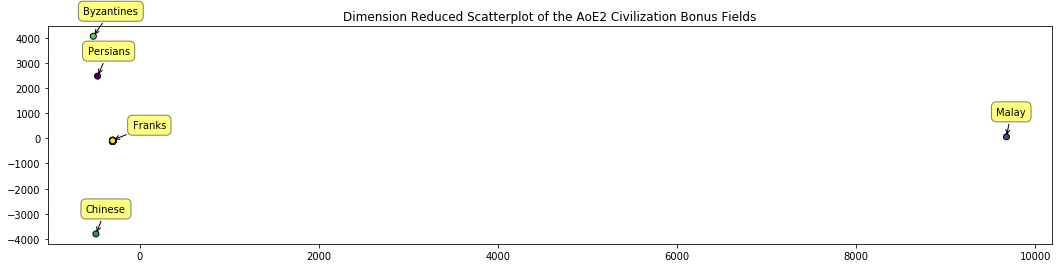

In [102]:

from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

pca_ndarray = PCA(n_components=2).fit_transform(X)
db = DBSCAN(eps=700, min_samples=0.5).fit(pca_ndarray)
labels = db.labels_
fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot(111, autoscale_on=True)
cmap = plt.get_cmap('viridis_r')
path_collection = ax.scatter(pca_ndarray[:, 0], pca_ndarray[:, 1],
                             c=labels, edgecolors=(0, 0, 0), cmap=cmap)
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
for col, label, x, y in zip(labels, merge_df.index,
                            pca_ndarray[:, 0], pca_ndarray[:, 1]):
    if (label == 'Franks'):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, 10), **kwargs)
    elif (col == 1):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-10, 20), **kwargs)
    elif (col == 2):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-10, 20), **kwargs)
    elif (col == 3):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-10, 20), **kwargs)
    elif (col == 4):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-10, 20), **kwargs)
title_text = 'Dimension Reduced Scatterplot of the AoE2 '
title_text += 'Civilization Bonus Fields'
text = plt.title(title_text)

In [107]:

column_name = 'is_winner'
important_columns_list = [cn for (cn, ci) in importance_tuple_list]
X = merge_df[important_columns_list].values
y = merge_df[column_name].values

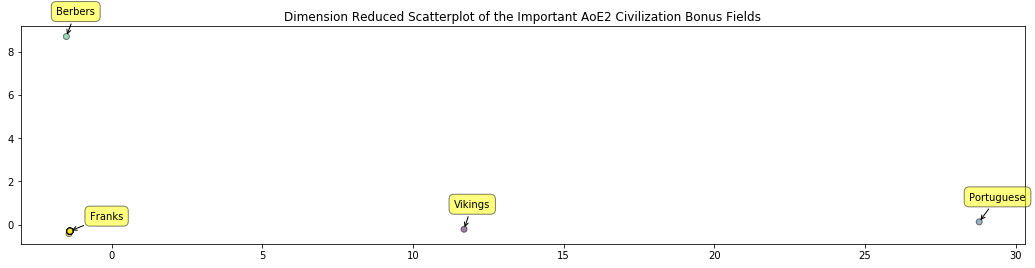

In [127]:

from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

pca_ndarray = PCA(n_components=2).fit_transform(X)
db = DBSCAN(eps=0.7, min_samples=0.5).fit(pca_ndarray)
labels = db.labels_
fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot(111, autoscale_on=True)
cmap = plt.get_cmap('viridis_r')
path_collection = ax.scatter(pca_ndarray[:, 0], pca_ndarray[:, 1],
                             c=labels, edgecolors=(0, 0, 0), alpha=0.5, cmap=cmap)
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
for col, label, x, y in zip(labels, merge_df.index,
                            pca_ndarray[:, 0], pca_ndarray[:, 1]):
    if (label == 'Franks'):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, 10), **kwargs)
    elif (col == 1):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-10, 20), **kwargs)
    elif (col == 2):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-10, 20), **kwargs)
    elif (col == 3):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-10, 20), **kwargs)
title_text = 'Dimension Reduced Scatterplot of the Important AoE2 '
title_text += 'Civilization Bonus Fields'
text = plt.title(title_text)

In [37]:

%%javascript
var kernel = IPython.notebook.kernel;
var body = document.body,  
    attribs = body.attributes;
var command = "notebook_path = " + "'"+attribs['data-notebook-path'].value+"'";
kernel.execute(command);

UsageError: Line magic function `%%javascript` not found.


In [125]:

from IPython.display import HTML

notebook_viewer_url = 'https://nbviewer.jupyter.org/github/dbabbitt/notebooks/blob/master/'
notebook_viewer_url += '/'.join(notebook_path.split('/')[1:])
message_str = 'Click <a href="{}" target="_blank">here</a> to view notebook in nbviewer.'
HTML(message_str.format(notebook_viewer_url))

0    28
3     1
2     1
1     1
dtype: int64